In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

/Users/annacrawford/anaconda/envs/Zaincorp/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(28, 28)


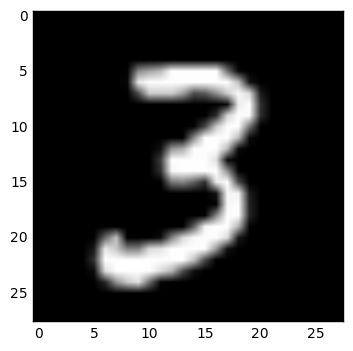

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Image of mnist digit
print X_test[4600].shape
plt.imshow(Image.fromarray(X_test[4600]), cmap='gray')
plt.show()

In [8]:
X_train

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [11]:
from keras.utils import np_utils

# reshape and normalise images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# print size of dataset
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


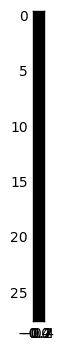

In [12]:
# Image after reshaping and normalisation

plt.imshow(X_test[4600,0], interpolation='nearest', cmap = 'gray')
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

model = Sequential() # defien sequential model

model.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu')) # add convolution layer
model.add(MaxPooling2D((2,2))) # add MaxPooling layer


model.add(Flatten()) # flatten matrix into vector
model.add(Dense(128, init = 'uniform', activation = 'relu')) # add dense layer, intialising weights from the uniform 
# distribution with the Rectifier activation function
model.add(Dense(10, init = 'uniform', activation = 'softmax')) # add final layer with the same number of nodes as
# output classes
# compile model using the binary crossentropy loss function with backpropagator 'adam'
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# print model summary
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 13, 13, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 5408)          0           maxpooling2d_2[0][0]             
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 128)           692352      flatten_2[0][0]                  
___________________________________________________________________________________________

In [15]:
# fit model using training set
model.fit(X_train, Y_train, nb_epoch = 10, batch_size = 32, verbose = 0)

In [19]:
from keras.models import model_from_json
model_json=model.to_json()
with open("model.json",'w') as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [188]:
print model.evaluate(X_test, keras.utils.np_utils.to_categorical(y_test) )

 9984/10000 [============================>.] - ETA: 0s[0.021613970785751009, 0.99262999668121343]


In [189]:
# get filters from the convolutional layer
filters = model.layers[0].get_weights()[0]
filters = np.squeeze(filters)
filters.shape

(3, 3, 32)

In [255]:
filters[:,:,0]

array([[ 0.01043396, -0.15912718, -0.03306305],
       [-0.15923083, -0.03695469, -0.07808395],
       [-0.09029804,  0.07051317, -0.13903104]], dtype=float32)

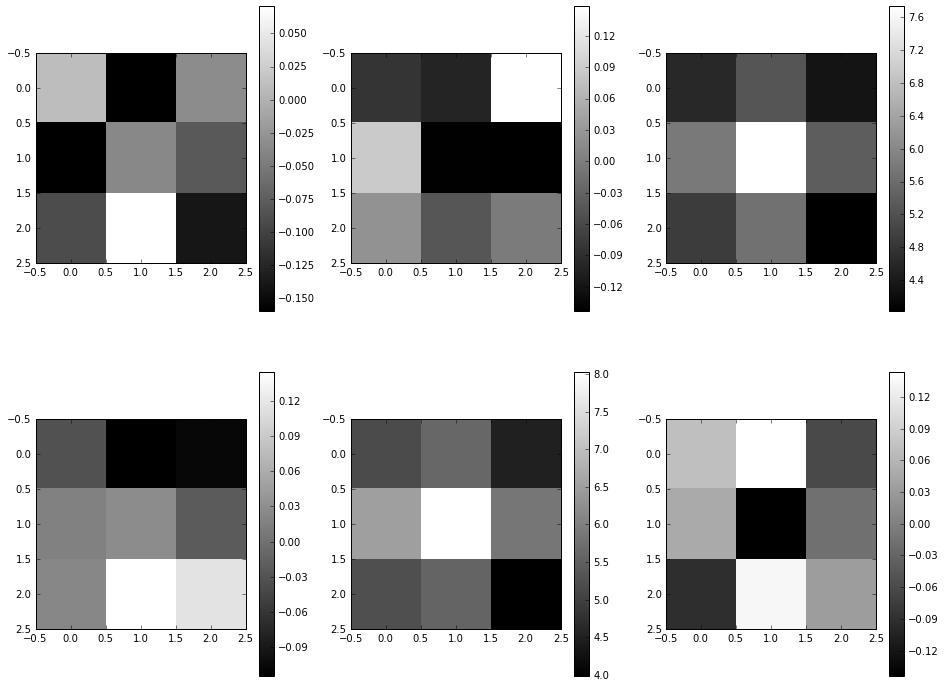

In [256]:
# Visualise first six filters in convolution layer

plt.figure(figsize = (16, 12))

plt.subplot(2, 3, 1)
plt.imshow(filters[:,:,0], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(filters[:,:,1], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(filters[:,:,2], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(filters[:,:,3], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(filters[:,:,4], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(filters[:,:,5], interpolation='nearest', cmap = 'gray')
plt.colorbar()
plt.show()

In [194]:
# define Theano function using the input and output of the first layer
convolution = theano.function([model.layers[0].input], model.layers[0].output)

In [275]:
# reshape result to visualise
after_filter = np.squeeze(convolution([X_test[4600].reshape(28,28,1)]))

In [276]:
after_filter.shape

(26, 26, 32)

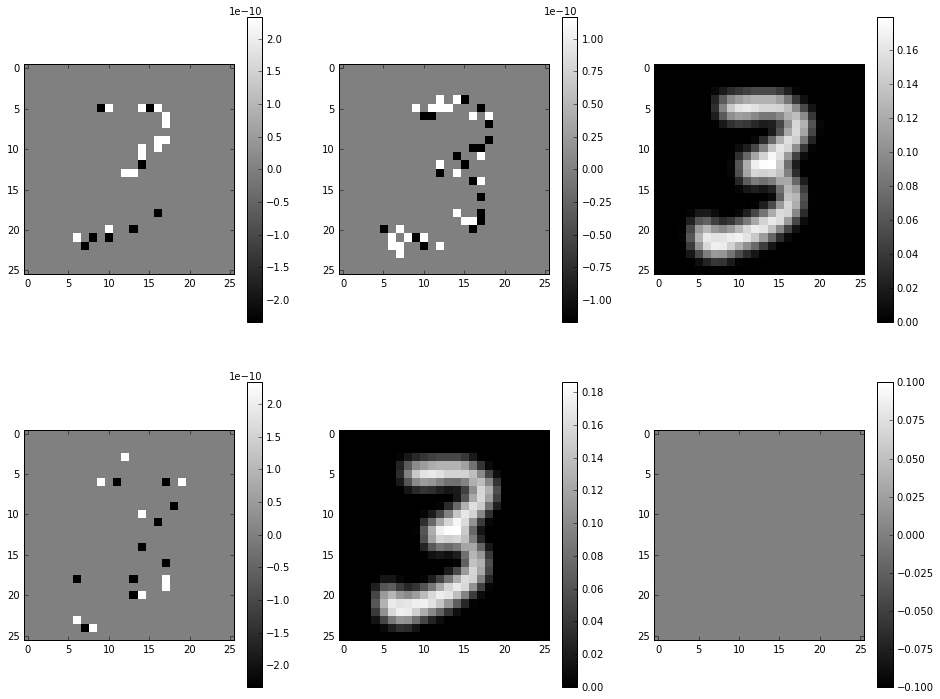

In [277]:
# Visualise first six filters in convolution layer

plt.figure(figsize = (16, 12))

plt.subplot(2, 3, 1)
plt.imshow(after_filter[:,:,0], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(after_filter[:,:,1], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(after_filter[:,:,2], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(after_filter[:,:,3], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(after_filter[:,:,4], interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(after_filter[:,:,5], interpolation='nearest', cmap = 'gray')
plt.colorbar()
plt.show()

In [211]:
maxpool = theano.function([model.layers[1].input], model.layers[1].output)

In [249]:
after_pool = maxpool([after_filter[:,:,0].reshape(26, 26, 1)])

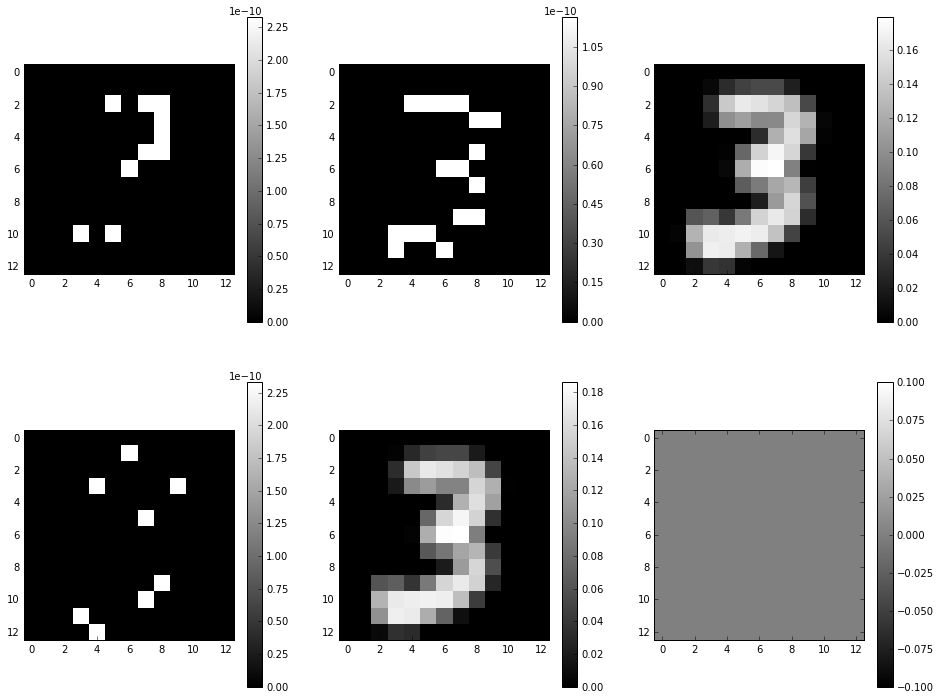

In [253]:
# Visualise Maxpooling after convolution

plt.figure(figsize = (16, 12))

plt.subplot(2, 3, 1)
plt.imshow(np.squeeze(maxpool([after_filter[:,:,0].reshape(26, 26, 1)])), interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(np.squeeze(maxpool([after_filter[:,:,1].reshape(26, 26, 1)])), interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(np.squeeze(maxpool([after_filter[:,:,2].reshape(26, 26, 1)])), interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(np.squeeze(maxpool([after_filter[:,:,3].reshape(26, 26, 1)])), interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(np.squeeze(maxpool([after_filter[:,:,4].reshape(26, 26, 1)])), interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(np.squeeze(maxpool([after_filter[:,:,5].reshape(26, 26, 1)])), interpolation='nearest', cmap = 'gray')
plt.colorbar()

plt.show()